### Task 2 : Movie Rating Prediction using Python

Importing required modules

In [31]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Loading data

In [4]:
dataset = pd.read_csv("IMDb Movies India.csv", encoding="Latin")
data = dataset.copy()

Data inspection

In [9]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Data summary statistics

In [7]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Pre-processing EDA

- Dropping redundant values

In [ ]:
#Name column

In [17]:
data.Name[:3] #Name column contains unique and unstructured texts, this we can simply remove the column

0                                      
1    #Gadhvi (He thought he was Gandhi)
2                           #Homecoming
Name: Name, dtype: object

In [19]:
data.drop(columns=["Name"], inplace=True)

- Null value processing

In [24]:
data.isnull().sum()/len(data)*100

Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [ ]:
#Duration column 

In [45]:
durations = data[data.Duration.notna()].Duration

In [51]:
durations[:3]

1    109 min
2     90 min
3    110 min
Name: Duration, dtype: object

In [47]:
def format_duration(dur):
    return int(dur.split()[0])

In [54]:
avg_duration = int(durations.apply(format_duration).mean())
avg_duration

128

In [56]:
data.Duration.fillna(f"{avg_duration} min", inplace=True)

In [58]:
data.Duration.isnull().sum() #Thus null values of duration column processed

0

In [64]:
#Rating column : fill with average rating
data.Rating.fillna(np.round(data.Rating.mean(),1), inplace=True)

In [79]:
#Votes column : fill with average votes
votes = data[data.Votes.notna()].Votes

In [99]:
votes[:5]

1        8
3       35
5      827
6    1,086
8      326
Name: Votes, dtype: object

In [106]:
#Beacuse '$5.16M', '1,223'
def format_votes(vote):
    if re.fullmatch("(\d+\,\d+)|\d+",vote):
        if "," in vote:
            vote = int(re.sub(",","",vote))
            return vote
        return int(vote)

In [136]:
review = list(str(votes.apply(format_votes).mean()).split(".")[0])
review.insert(1,",")
avg_value = "".join(review)
avg_value

'1,938'

In [142]:
data.Votes.replace({'$5.16M':np.nan}, inplace=True)

In [143]:
data.Votes.fillna(avg_value, inplace=True)

In [144]:
data.Votes.isnull().sum()

0

In [150]:
data.isnull().sum() #Since rest of the colunms do not have null values more than 20%, we will simply drop them 

Year         528
Duration       0
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [151]:
data.dropna(inplace=True)

In [152]:
data.isnull().sum().sum() #removed all the null values

0

- Formatting data

In [153]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",5.8,"1,938",Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,5.8,"1,938",Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [154]:
#Year column

In [157]:
def format_year(year):
    year = year[1:-1]
    return int(year)

In [159]:
data.Year = data.Year.apply(format_year)

In [160]:
#Duration column
data.Duration = data.Duration.apply(format_duration)

In [161]:
#Votes column
data.Votes = data.Votes.apply(format_votes)

In [162]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,90,"Drama, Musical",5.8,1938,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,105,Drama,5.8,1938,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


- Scaling numerical data

In [172]:
columns = ["Duration", "Votes"]

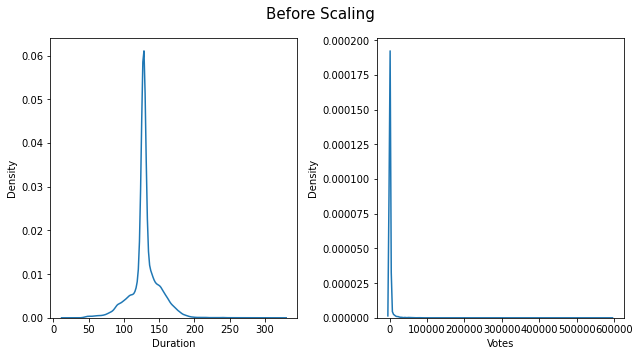

In [176]:
plt.figure(figsize=(9,5))
for i in range(len(columns)):
    plt.subplot(1,2,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("Before Scaling", fontsize=15)
plt.tight_layout()

In [177]:
pipeline = Pipeline([
    ("Standard scaler",StandardScaler()),
    ("Robust scaler", RobustScaler())
])

In [178]:
data[columns] = pipeline.fit_transform(data[columns])

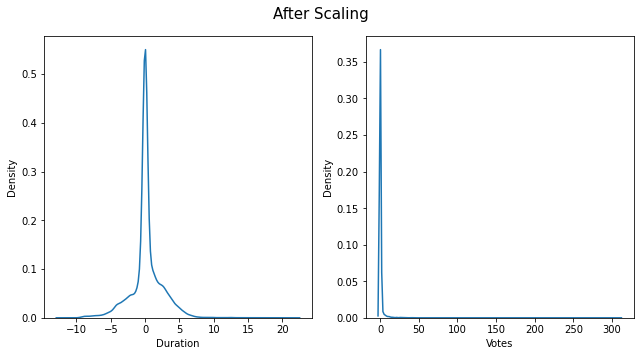

In [179]:
plt.figure(figsize=(9,5))
for i in range(len(columns)):
    plt.subplot(1,2,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("After Scaling", fontsize=15)
plt.tight_layout()

- Encoding Data

In [180]:
data.head(3)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,-2.111111,Drama,7.0,-0.196644,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,-4.222222,"Drama, Musical",5.8,0.815417,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,-2.000000,"Comedy, Romance",4.4,-0.182486,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [181]:
columns = ['Genre','Director','Actor 1','Actor 2','Actor 3']

In [182]:
for col in columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [183]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,-2.111111,272,7.0,-0.196644,1177,2638,4089,498
2,2021,-4.222222,323,5.8,0.815417,3897,2986,2465,3147
3,2019,-2.000000,219,4.4,-0.182486,2523,2346,1291,3672
4,2010,-2.555556,272,5.8,0.815417,299,2504,2980,382
5,1997,2.111111,188,4.7,0.232826,2901,742,109,3496


Data Splitting 

In [184]:
X = data.drop(columns=["Rating"])
y = data["Rating"]
X.shape, y.shape

((11086, 8), (11086,))

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Model Selection

- Model training

In [186]:
#Linear regresssion model
linear_model = LinearRegression().fit(X_train, y_train)

#Random forest model
rf_model = RandomForestRegressor().fit(X_train, y_train)

#Gradient boosting model
gb_model = GradientBoostingRegressor().fit(X_train, y_train)

- Making predictions

In [187]:
#Linear regresssion predictions
linear_preds = linear_model.predict(X_test)

#Random forest predictions
rf_preds = rf_model.predict(X_test)

#Gradient boosting predictions
gb_preds = gb_model.predict(X_test)

Model Evaluation 

In [188]:
def evaluate(model_name, y_preds, y_test=y_test):
    plt.figure(figsize=(10, 5))
    # Scatter plot of actual vs. predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_preds)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')

    # Residual plot : Plot the residuals (the differences between actual and predicted values) against the predicted values. This helps you identify patterns or trends in the errors.
    plt.subplot(1, 2, 2)
    residuals = y_test - y_preds
    plt.scatter(y_preds, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

    # Error Metrics
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)
    print(f"Model : {model_name}")
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

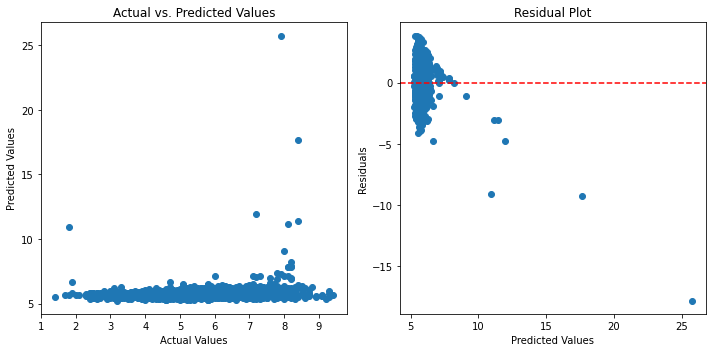

Model : Linear regression
Mean Squared Error (MSE): 1.38
Root Mean Squared Error (RMSE): 1.18
Mean Absolute Error (MAE): 0.80
R-squared (R2): -0.06


In [189]:
evaluate("Linear regression",linear_preds)

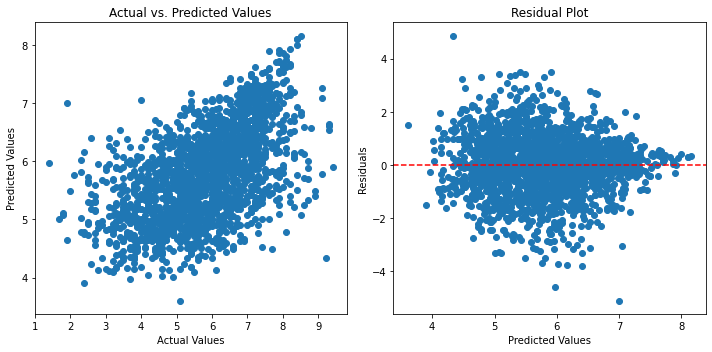

Model : random forest
Mean Squared Error (MSE): 0.89
Root Mean Squared Error (RMSE): 0.94
Mean Absolute Error (MAE): 0.60
R-squared (R2): 0.32


In [190]:
evaluate("random forest",rf_preds)

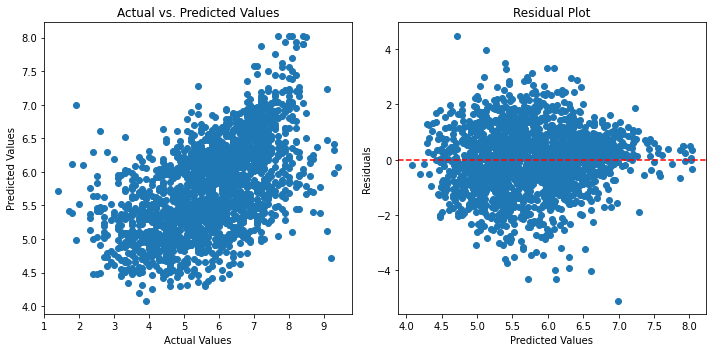

Model : gradient boosting
Mean Squared Error (MSE): 0.89
Root Mean Squared Error (RMSE): 0.94
Mean Absolute Error (MAE): 0.63
R-squared (R2): 0.32


In [191]:
evaluate("gradient boosting", gb_preds)

Conclusion 

- Random forest is giving the best results